# Decision Tree

<td>
    <a href="https://colab.research.google.com/github/nikitaosovskiy/hadnson_ml/blob/main/07-decision_tree/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
</td>

In [86]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.model_selection import GridSearchCV, train_test_split, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.base import clone
from scipy.stats import mode

%matplotlib inline
import matplotlib.pyplot as plt

# Task 1

## Data preparation

In [2]:
moons = make_moons(n_samples=10000, noise=0.4)

In [3]:
X = moons[0]
y = moons[1]

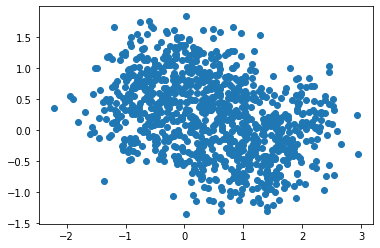

In [4]:
plt.scatter(X[:1000, 0], X[:1000, 1])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [87]:
grid_params = [
    {'max_leaf_nodes': list(range(1, 100))}
]

grid_search = GridSearchCV(DecisionTreeClassifier(), grid_params, cv=5, 
                          scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

/mnt/d/Projects/handson_ml/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/mnt/d/Projects/handson_ml/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/mnt/d/Projects/handson_ml/env/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/mnt/d/Projects/handson_ml/env/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 314, in fit
    raise ValueError(
ValueError: max_le

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                             12, 13, 14, 15, 16, 17, 18, 19, 20,
                                             21, 22, 23, 24, 25, 26, 27, 28, 29,
                                             30, ...]}],
             return_train_score=True, scoring='accuracy')

In [90]:
grid_search.best_score_

0.852

In [91]:
grid_search.best_params_

{'max_leaf_nodes': 18}

## Evaluation

In [22]:
best_model = grid_search.best_estimator_

In [23]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=4)

In [25]:
y_pred = best_model.predict(X_test)

In [27]:
accuracy_score(y_test, y_pred)

0.8555

# 2 Task

In [28]:
shuffle = ShuffleSplit(n_splits=1000, random_state=42, train_size=100)

In [85]:
i = 1
accuracy_scores = []
for train, test in shuffle.split(X, y):
    dec_tree = DecisionTreeClassifier()
    dec_tree.fit(X[train], y[train])
    y_pred = dec_tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    print(f'Tree {i}: {accuracy_score(y_test, y_pred)}')
    i += 1
print('Mean: ', np.mean(accuracy_scores))

Tree 1: 0.809
Tree 2: 0.8045
Tree 3: 0.764
Tree 4: 0.764
Tree 5: 0.771
Tree 6: 0.751
Tree 7: 0.7645
Tree 8: 0.7805
Tree 9: 0.77
Tree 10: 0.7985
Tree 11: 0.8295
Tree 12: 0.7825
Tree 13: 0.8025
Tree 14: 0.7925
Tree 15: 0.8225
Tree 16: 0.8095
Tree 17: 0.7815
Tree 18: 0.789
Tree 19: 0.7795
Tree 20: 0.8235
Tree 21: 0.809
Tree 22: 0.8005
Tree 23: 0.789
Tree 24: 0.6985
Tree 25: 0.7585
Tree 26: 0.8235
Tree 27: 0.799
Tree 28: 0.8225
Tree 29: 0.8215
Tree 30: 0.763
Tree 31: 0.762
Tree 32: 0.7795
Tree 33: 0.772
Tree 34: 0.828
Tree 35: 0.7865
Tree 36: 0.791
Tree 37: 0.812
Tree 38: 0.779
Tree 39: 0.7855
Tree 40: 0.799
Tree 41: 0.7455
Tree 42: 0.757
Tree 43: 0.7195
Tree 44: 0.812
Tree 45: 0.786
Tree 46: 0.798
Tree 47: 0.761
Tree 48: 0.7595
Tree 49: 0.781
Tree 50: 0.7995
Tree 51: 0.7585
Tree 52: 0.801
Tree 53: 0.734
Tree 54: 0.7915
Tree 55: 0.83
Tree 56: 0.722
Tree 57: 0.818
Tree 58: 0.803
Tree 59: 0.749
Tree 60: 0.7545
Tree 61: 0.7695
Tree 62: 0.7985
Tree 63: 0.807
Tree 64: 0.8025
Tree 65: 0.7695
Tre

Tree 595: 0.805
Tree 596: 0.7565
Tree 597: 0.725
Tree 598: 0.8005
Tree 599: 0.742
Tree 600: 0.808
Tree 601: 0.78
Tree 602: 0.7995
Tree 603: 0.7685
Tree 604: 0.7905
Tree 605: 0.7925
Tree 606: 0.7205
Tree 607: 0.799
Tree 608: 0.777
Tree 609: 0.7925
Tree 610: 0.781
Tree 611: 0.785
Tree 612: 0.7465
Tree 613: 0.7845
Tree 614: 0.8085
Tree 615: 0.7415
Tree 616: 0.81
Tree 617: 0.803
Tree 618: 0.836
Tree 619: 0.723
Tree 620: 0.789
Tree 621: 0.788
Tree 622: 0.7715
Tree 623: 0.766
Tree 624: 0.8065
Tree 625: 0.806
Tree 626: 0.8205
Tree 627: 0.808
Tree 628: 0.805
Tree 629: 0.788
Tree 630: 0.7725
Tree 631: 0.7625
Tree 632: 0.8145
Tree 633: 0.811
Tree 634: 0.7795
Tree 635: 0.7935
Tree 636: 0.8025
Tree 637: 0.776
Tree 638: 0.8085
Tree 639: 0.778
Tree 640: 0.697
Tree 641: 0.7845
Tree 642: 0.8115
Tree 643: 0.794
Tree 644: 0.8025
Tree 645: 0.7685
Tree 646: 0.8405
Tree 647: 0.7955
Tree 648: 0.774
Tree 649: 0.819
Tree 650: 0.786
Tree 651: 0.773
Tree 652: 0.805
Tree 653: 0.7535
Tree 654: 0.809
Tree 655: 0.8

In [51]:
predictions = []
for train, test in shuffle.split(X, y):
    dec_tree = DecisionTreeClassifier()
    dec_tree.fit(X[train], y[train])
    y_pred = dec_tree.predict(X_test)
    predictions.append(y_pred)

In [54]:
predictions = np.array(predictions)

In [76]:
int(mode(predictions[:, 1])[0])

0

In [78]:
result_predictions = []
for i in range(predictions.shape[1]):
    result_predictions.append(int(mode(predictions[:, i])[0]))

In [80]:
accuracy_score(y_test, result_predictions)

0.863

In [92]:
forest = [clone(grid_search.best_estimator_) for _ in range(1000)]